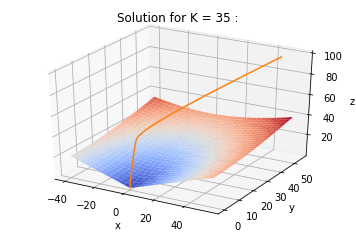

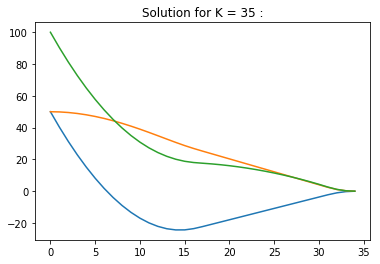

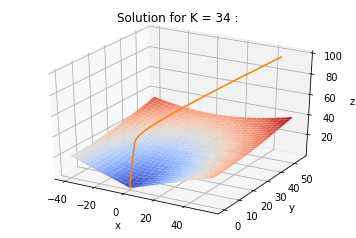

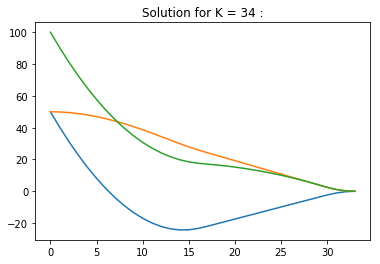

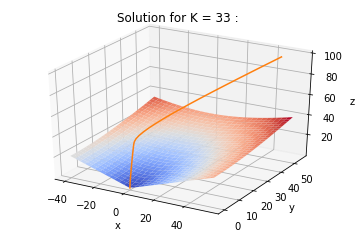

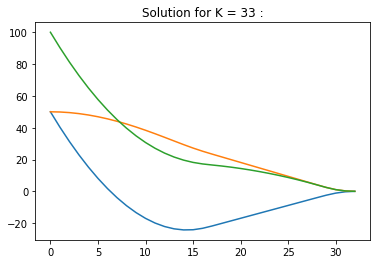

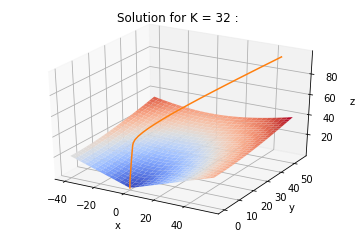

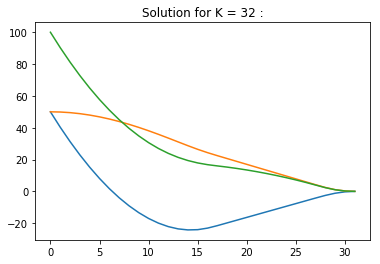

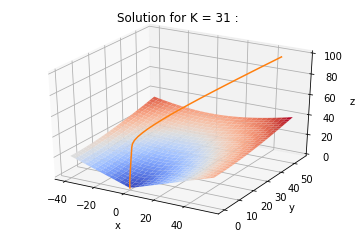

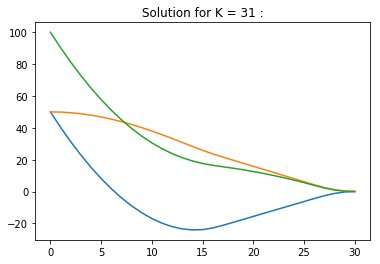

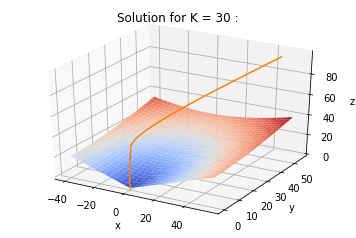

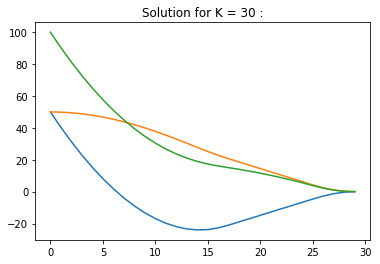

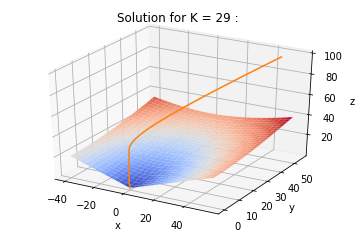

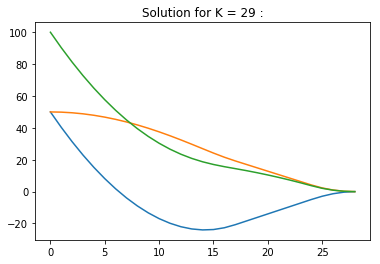

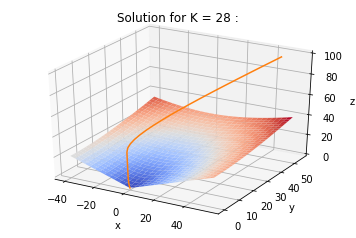

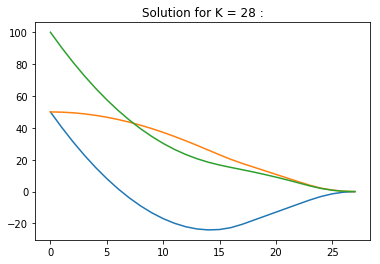

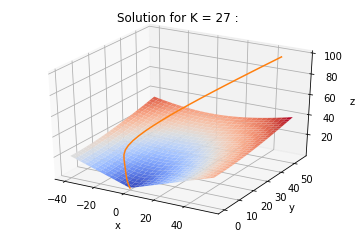

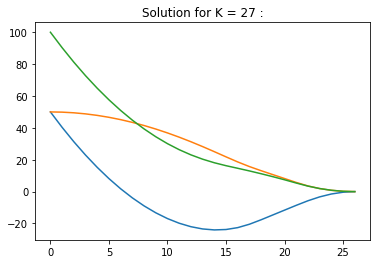

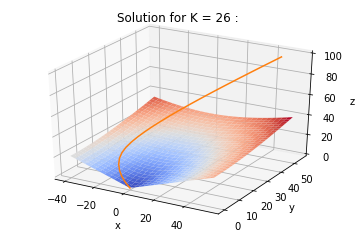

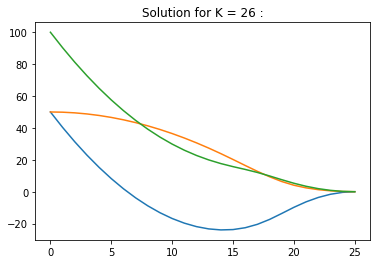

For K = 25, the problem becomes infeasible


In [62]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

# Parameters
h = 1.
g = 0.1
m = 10.
Fmax = 10.
p0 = np.array([50,50,100])
v0 = np.array([-10,0,-10])
alpha = 0.5
gamma = 1.
gv = np.array([0,0,g])

# CVXPY problem setup
p = cp.Variable((3,K)) # position vectors
v = cp.Variable((3,K)) # velocity vectors
f = cp.Variable((3,K)) # thrust vectors

# Different values of K
list_k = [35,34,33,32,31,30,29,28,27,26,25]

for i in list_k :
    K = i
    
    gv = np.array([0,0,g])

    # CVXPY problem setup
    p = cp.Variable((3,K)) # position vectors
    v = cp.Variable((3,K)) # velocity vectors
    f = cp.Variable((3,K)) # thrust vectors

    fuel = 0
    for k in range(K):
        fuel = fuel + gamma * h * cp.norm(f[:,k], 2)

    objective = cp.Minimize(fuel)
    constraints = [
        # Initial state
        p[:,0] == p0,
        v[:,0] == v0,
        # Target
        p[:,-1] == 0,
        v[:,-1] == 0,
    ]

    for k in range(K):
        constraints += [
            # Maximal thrust
            cp.norm(f[:,k], 2) <= Fmax,
            # Glide cone. The spacecraft must remain in this region
            p[2,k] >= alpha * cp.norm(p[:2,k], 2)
        ]

    # Spacecraft dynamics constraints
    for k in range(K-1):
        constraints += [
            v[:,k+1] == v[:,k] + h/m*f[:,k] - h*gv,
            p[:,k+1] == p[:,k] + h/2*(v[:,k] + v[:,k+1])
        ]

    prob = cp.Problem(objective, constraints)
    res = prob.solve(verbose=False)
    
    if prob.status!='infeasible':
        # use the following code to plot your trajectories
        # and the glide cone (don't modify)
        # -------------------------------------------------------
        #plt.subplot(5, 5, abs(K-35-1))
        #print(f'############## Solution for K = {K} : ###############')
        #fig = plt.figure()
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        X = np.linspace(-40, 55, num=30)
        Y = np.linspace(0, 55, num=30)
        X, Y = np.meshgrid(X, Y)
        Z = alpha*np.sqrt(X**2+Y**2)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
        #Have your solution be stored in p
        ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:])
        ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
        plt.title(f'Solution for K = {K} :')
        plt.show()

        plt.plot(p.value.T)
        plt.title(f'Solution for K = {K} :')
        plt.show()
    else :
        print(f'For K = {K}, the problem becomes infeasible')
